### 학습 목표
- 직접 로지스틱 회귀 분석 모델로 타이타닉 데이터셋을 분석해 생존자를 예측하고 작동 원리를 이해한다. 또한 분류(Classification) 문제를 예측하고 평가한다.

### 학습 순서
- 문제 정의
- 라이브러리 및 데이터 불러오기
- 데이터 확인
- 전처리 : 범주 변수 변환하기(더미 변수와 원-핫 인코딩)
- 모델링 및 예측하기
- 예측 모델 평가하기
- 이해하기
  - 피처엔지니어링 / 로지스틱 회귀 분석

### 로지스틱 회귀 소개
- 로지스틱 회귀(Logistic Regression) 또한 선형 회귀처럼 기본 분석 모델이다.
- 로지스틱 회귀 분석은 알고리즘의 근간을 선형 회귀 분석에 두고 있어서 선형 회귀 분석과 상당히 유사하지만, 다루는 문제는 다르다
- 선형 회귀 분석은 연속된 변수를 예측하는 반면, 로지스틱 회귀 분석은 Yes/No 처럼 두 가지로 나뉘는 분류 문제를 다룬다.

### 장점
- 선형 회귀 분석만큼 구현하기 용이하다.
- 계수(기울기)를 사용해 각 변수의 중요성을 쉽게 파악할 수 있다.

### 단점
- 선형 회귀 분석을 근간으로 하고 있기 때문에, 선형 관계가 아닌 데이터에 대한 예측력이 떨어진다.

### 유용한 곳
- Yes/No, True/False와 같은 두 가지 범주로 나뉜 값을 예측하는 데 사용
- 분류 문제에 있어 기준선(baseline)으로 자주 활용된다. (타 모델과 비교 목적)

## 5.2 라이브러리 및 데이터 불러오기

In [217]:
import pandas as pd
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/titanic.csv'
data = pd.read_csv(file_url)

## 5.3 데이터 확인하기

In [218]:
data.head()

# 독립변수 8개와, 종속변수(Survived) 1개를 볼 수 있다.
# Pclass: 티켓 클래스
# SibSp: 함께 탑승한 형제 및 배우자의 수
# Parch : 함께 탑승한 부모 및 자녀의 수
# Embarked : 승선한 항구
# Survived : 생존 유무 (1 = 생존, 0 = 사망)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S,0


In [219]:
data.info() # 변수 특징 출력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Name      889 non-null    object 
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Ticket    889 non-null    object 
 7   Embarked  889 non-null    object 
 8   Survived  889 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 62.6+ KB


In [220]:
data.describe() # 통계 정보 출력

,Pclass,Age,SibSp,Parch,Survived
count,889.000000,889.000000,889.000000,889.000000,889.000000
mean,2.311586,29.315152,0.524184,0.382452,0.382452
std,0.834700,12.984932,1.103705,0.806761,0.486260
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,0.000000
75%,3.000000,35.000000,1.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,1.000000


In [221]:
data.corr() # 상관관계 출력

# 상관 관계는 숫자(절대값 기준)가 클수록 강한 것
# 밑의 표에서는 SibSp와 Parch의 상관관계가 가장 크다.

# 결과 테이블에 자료형이 object인 변수 4개가 빠져 있다.
# => 상관관계는 숫자가 아니면 계산이 안 되기 때문에, 파이썬에서 자동으로 문자형 변수들을 제거하고 상관관계를 보여준다.
# 0에 가까울수록 상관관계가 없는 것, 1 혹은 -1에 가까울수록 상관관계가 큰 것이다.

,Pclass,Age,SibSp,Parch,Survived
Pclass,1.000000,-0.336512,0.081656,0.016824,-0.335549
Age,-0.336512,1.000000,-0.232543,-0.171485,-0.069822
SibSp,0.081656,-0.232543,1.000000,0.414542,-0.034040
Parch,0.016824,-0.171485,0.414542,1.000000,0.083151
Survived,-0.335549,-0.069822,-0.034040,0.083151,1.000000


In [222]:
import matplotlib.pyplot as plt
import seaborn as sns

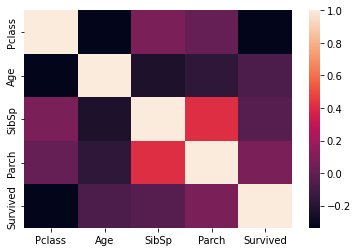

In [223]:
sns.heatmap(data.corr()) # 상관관계에 대한 히트맵 생성
plt.show() # 그래프 출력, matplotlib과 seaborn이 최근 버전이면 제외해도 상관없음

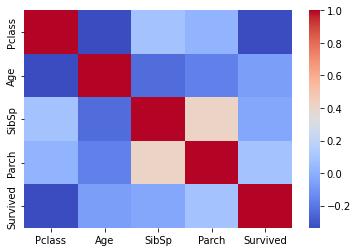

In [224]:
sns.heatmap(data.corr(), cmap='coolwarm')
plt.show()

<AxesSubplot:>

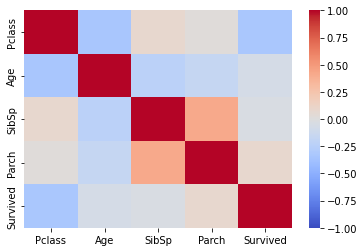

In [225]:
sns.heatmap(data.corr(), cmap='coolwarm', vmin=-1, vmax=1)

<AxesSubplot:>

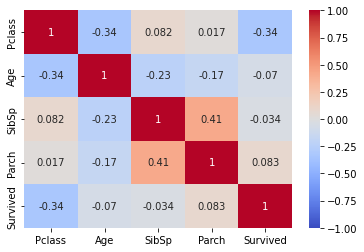

In [226]:
sns.heatmap(data.corr(), cmap='coolwarm', vmin=-1, vmax=1, annot=True)

## 5.4 전처리 : 카테고리 변수 변환하기(더미 변수와 원-핫 인코딩)


- object형을 숫자화한다면, 단순하게는 각 값(특정 문자)을 숫자로 대체하는 방법이 있다.
  - 가령, 계절이라는 변수의 값으로 봄, 여름, 가을, 겨울이 있다면 각각을 1, 2, 3, 4로 대체하는 방법
  - 때에 따라서는 이 방법이 효과적일 때도 있으나 기본적으로 지양해야 한다.
  - 특히나 선형 모델에 이 방법을 사용하면 숫자가 상대적인 서열로 인식된다.
  - 즉 봄보다 겨울이 큰 개념으로 학습된다.
- 위의 문제를 피하는 데 더미 변수를 활용한다.

- 더미 변수와 원-핫 인코딩 : 범주 형태(혹은 문자 형태)의 변수를 숫자로 표현하는 방법으로, 변수에 속해 있는 고윳값에 대한 새로운 변수들을 만들어 0과 1로 표현
  - Sex에는 male과 female 더미 변수 2개
  - 원-핫 인코딩을 할 때 한 가지 고려할 사항
    - 값이 수백 수천 가지라면 어떻게 할까요? 새로운 컬럼을 수백개나 만들어야 할까요? 정말 중요하면 어떤 수단을 써서라도 숫자화해야겠지만, 그렇지 않다면 데이터에서 제외시키거나 다른 방법으로 처리하는 것이 좋다.

In [227]:
# 고윳값이 수백 가지라서 더미 변수로 변환시키면 그 수만큼 컬럼이 생긴다.
# => 이 수많은 변수들이 결과를 도출하는 데 꼭 필요한지 고민
# => 이름에 따라 사망 여부가 갈린다고 추론하기는 어렵기 때문에 Name은 제외
data['Name'].nunique()

889

In [228]:
data['Sex'].nunique()

2

In [229]:
# Ticket 도 제외
data['Ticket'].nunique()

680

In [230]:
data['Embarked'].nunique()

3

In [231]:
data = data.drop(['Name','Ticket'], axis=1)
data.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,3,male,22.0,1,0,S,0
1,1,female,38.0,1,0,C,1
2,3,female,26.0,0,0,S,1
3,1,female,35.0,1,0,S,1
4,3,male,35.0,0,0,S,0


In [232]:
# Name과 Ticket 변수를 데이터에서 제외하고, 남은 두 object형을 원-핫 인코딩
# 판다스의 get_dummies() 함수를 사용하여 문자 형태의 변수들을 원-핫-인코딩
pd.get_dummies(data, columns = ['Sex','Embarked'])

# Sex에서 2개, Embarked에서 3개, 총 5개의 더미 변수가 새로 추가되었음.
# => 더미 변수가 생기면서 기존의 Sex와 Embarked 컬럼(변수)는 사라졌다.

,Pclass,Age,SibSp,Parch,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,0,0,1,0,0,1
1,1,38.0,1,0,1,1,0,1,0,0
2,3,26.0,0,0,1,1,0,0,0,1
3,1,35.0,1,0,1,1,0,0,0,1
4,3,35.0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
884,2,27.0,0,0,0,0,1,0,0,1
885,1,19.0,0,0,1,1,0,0,0,1
886,3,28.0,1,2,0,1,0,0,0,1
887,1,26.0,0,0,1,0,1,1,0,0


In [233]:
# 한 단계 더 나아가보면, 
# 예를 들어 Sex_male이 0이면 당연히 이 승객은 female에 해당한다. => 둘 중 하나만 남겨도 구분 가능
# Embarked도 마찬가지로, Embarked_Q와 Embarked_S가 모두 0이면 Embarked_C에 해당하는 승객이다.
# => 즉, 더미 변수에서 고윳값 개수보다 하나를 덜 사용해도 구분하는 데 문제가 없다.
# => 이렇게 컬럼 개수를 줄여주면 데이터 계산량이 줄어든다.

# drop_first 매개변수 추가를 하면 위의 기능이 적용된다.
pd.get_dummies(data, columns = ['Sex','Embarked'], drop_first = True)

,Pclass,Age,SibSp,Parch,Survived,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,0,1,0,1
1,1,38.0,1,0,1,0,0,0
2,3,26.0,0,0,1,0,0,1
3,1,35.0,1,0,1,0,0,1
4,3,35.0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...
884,2,27.0,0,0,0,1,0,1
885,1,19.0,0,0,1,0,0,1
886,3,28.0,1,2,0,0,0,1
887,1,26.0,0,0,1,1,0,0


In [234]:
data = pd.get_dummies(data, columns = ['Sex','Embarked'], drop_first = True)

## 5.5 모델링 및 예측하기

In [235]:
from sklearn.model_selection import train_test_split

X = data.drop('Survived', axis = 1) # 데이터셋에서 종속변수 제거 후 저장
y = data['Survived'] # 데이터셋에서 종속변수만 저장
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100) # 학습셋, 시험셋 분리

In [236]:
from sklearn.linear_model import LogisticRegression

In [237]:
model = LogisticRegression() # 로지스틱 회귀 모델 생성
model.fit(X_train, y_train) # 모델 학습

LogisticRegression()

In [238]:
pred = model.predict(X_test) # 예측

## 5.6 예측 모델 평가하기

- 1장에서는 실젯값과 예측값의 차이를 각각 합산하는 RMSE를 사용해 예측 결과를 평가했다.
- 하지만 이번 데이터 목푯값은 0과 1로 나누어진 이진분류(Binary Classfication)이기 때문에 RMSE는 평가에 적합하지 않다.
- 다양한 이진분류 평가 지표 : 정확도(accuracy), 오차 행렬, 정밀도(precision), 재현율(recall), F1 Score, 민감도, 특이도, AUC

In [239]:
# 정확도 : 예측값과 실제값을 비교하여 얼마나 맞추었는지 확인.
# => 즉, 시험셋 100개를 예측하고 그중 90개를 정확히 맞췄다면 정확도는 0.9, 모두 맞췄다면 1.0
from sklearn.metrics import accuracy_score # 정확도 라이브러리 임포트
accuracy_score(y_test, pred) # 실제값과 예측값으로 정확도 계산

0.7808988764044944

In [240]:
# 4장 선형회귀에서는 array()안에 리스트가 []로 된 반면, 이번에는 2중 리스트 형태인 [[]] 로 되어있다.
model.coef_

array([[-1.18251331, -0.03993612, -0.32138082,  0.00792433, -2.5686422 ,
        -0.0786295 , -0.23527496]])

In [241]:
# X의 컬럼을 사용해 판다스 시리즈로 변환
# Error : 넣은 데이터 model.coef_의 길이는 1인데, 인덱스 X.columns의 길이는 7이라서 안 된다.
# => 즉, X.columns로 7개 값을 입력한다고 지정했으니, model.coef_ 길이가 7이어야 한다.
pd.Series(model.coef_, index = X.columns)

ValueError: Length of values (1) does not match length of index (7)

In [ ]:
len(model.coef_)

1

In [ ]:
# 에러를 피하기 위한 방법
# => 첫 번째 값의 길이 출력
len(model.coef_[0])

7

In [ ]:
pd.Series(model.coef_[0], index = X.columns)
# model.coef_를 7개 값이 되도록 풀어서 컬럼 이름을 매핑

# 목표값인 survived가 1이면 생존, 0이면 사망

# 변수들의 영향 해석
# => Pclass는 음의 계수 : Pclass가 높을수록 생존 가능성 낮다
# => Age는 낮을수록, 성별은 여성이 생존 가능성이 높다

Pclass       -1.182513
Age          -0.039936
SibSp        -0.321381
Parch         0.007924
Sex_male     -2.568642
Embarked_Q   -0.078629
Embarked_S   -0.235275
dtype: float64

## 5.7 이해하기 : 피처 엔지니어링

피처 엔지니어링 : 기존 데이터를 손보아 더 나은 변수를 만드는 기법(특징 공학 또는 특성 공학)

- 선형 회귀 분석과 로지스틱 회귀 분석을 선형 모델이라 한다.
  - 이러한 선형 모델에서는 다중공선성(Multicollinearity)문제를 주의해야 한다.
  - 다중공선성은 독립변수 사이에 상관관계가 높은 때에 발생하는 문제이다.
  - 예를 들어 두 독립변수 A, B는 모두 목표 변수를 양의 방향으로 이끄는 계수를 가지고 있을 때 A와 B의 상관관계가 매우 높다면, y가 증가한 이유가 A때문인지 B때문인지 명확하지 않다. 그래서 그때그때 데이터의 특성에 따라 변덕스러운 결과 
    - 다중공선성 문제는 상관관계가 높은 변수 중 하나를 제거하거나, 둘을 모두 포괄시키는 새로운 변수를 만들거나, PCA와 같은 방법으로 차원 축소를 수행해 해결할 수 있다.
    - Parch와 SibSp가 그나마 조금 강한 상관관계를 보였으므로 이 둘을 새로운 변수로 만들자.

- PCA (Principal Component Analysis) 의 약자로, 주성분 분석
  - 차원 축소는 데이터의 차원, 즉 독립변수의 개수를 줄이는 방법을 뜻한다.
- 다중공선성 문제
  - 변수 간의 강한 상관관계가 있을 때 발생하는 문제. 선형 모델은 독립변수 간의 독립성을 전제로 하기 때문에, 다중공선성 문제를 해결해주는 것이 좋다.
  

In [242]:
# 사실 꼭 상관관계 수치 때문이 아니더라도, 직관적으로 이 두 변수를 합쳐보고 싶다는 생각
# => Parch는 부모와 자식, SibSp는 형제/자매와 배우자로, 결국 모두 가족구성원
# => 두 변수를 합하여 Family라는 컬럼 생성
data['family'] = data['SibSp'] + data['Parch'] # SibSp와 Parch 변수 합치기
data.drop(['SibSp', 'Parch'], axis=1, inplace=True) # SibSp와 Parch 변수 삭제

In [243]:
data.head()

,Pclass,Age,Survived,Sex_male,Embarked_Q,Embarked_S,family
0,3,22.0,0,1,0,1,1
1,1,38.0,1,0,0,0,1
2,3,26.0,1,0,0,1,0
3,1,35.0,1,0,0,1,1
4,3,35.0,0,1,0,1,0


In [244]:
X = data.drop('Survived', axis = 1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy_score(y_test, pred)

# 독립변수 수가 하나 줄었지만, 정확도가 0.012정도 높아졌다.

0.7921348314606742